## Problem Statement
- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute.
- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

- The company wants to know: Which variables are significant in predicting the demand for shared electric cycles in the Indian market? How well those variables describe the electric cycle demands

## Column Profiling:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not 
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:

    1: Clear, Few clouds, partly cloudy, partly cloudy
    
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [180]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [181]:
from scipy.stats import ttest_ind ,chi2_contingency , f_oneway , kruskal ,shapiro , levene
from statsmodels.graphics.gofplots import qqplot

In [182]:
data = pd.read_csv('yulu.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [184]:
# Converting data type of 'datetime' column to Date Time Format
data['datetime']= pd.to_datetime(data['datetime'])

In [185]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [187]:
data.shape

(10886, 12)

In [188]:
# Count of Null Values in each Column
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [189]:
# Unique values and its count 
data['holiday'].value_counts() # categorical Variable 

0    10575
1      311
Name: holiday, dtype: int64

In [190]:
# Unique values and its count 
data['workingday'].value_counts() # categorical Variable 

1    7412
0    3474
Name: workingday, dtype: int64

In [191]:
# Unique values and its count 
data['season'].value_counts() # categorical Variable 

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [192]:
# Unique values and its count 
data['weather'].value_counts() # categorical Variable 

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [193]:
# Converting Holiday , Workingday,Season and Weather to Object (as its Categorical)
col_convert = ['holiday','season','workingday','weather'] 
for i in col_convert :
    data[i]=data[i].astype('object')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


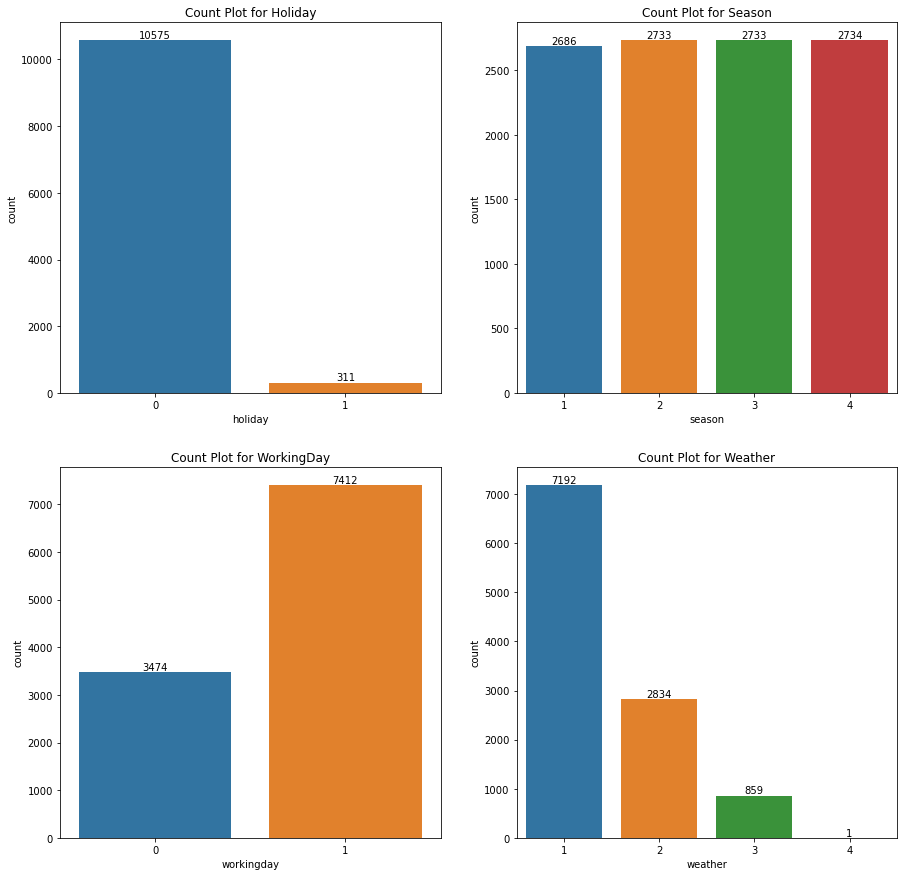

In [232]:
# Countplots of all the categorical variables

fig,axis = plt.subplots(nrows = 2 ,ncols = 2,figsize=(15,15))

ax= sns.countplot(x=data['holiday'], ax= axis[0,0])
axis[0,0].set_title("Count Plot for Holiday")

for i in ax.containers:
 ax.bar_label(i)

ax = sns.countplot(x=data['season'], ax= axis[0,1])
axis[0,1].set_title("Count Plot for Season")

for i in ax.containers:
 ax.bar_label(i)

ax=sns.countplot(x=data['workingday'], ax= axis[1,0])
axis[1,0].set_title("Count Plot for WorkingDay")

for i in ax.containers:
 ax.bar_label(i)

ax = sns.countplot(x=data['weather'], ax= axis[1,1])
axis[1,1].set_title("Count Plot for Weather")

for i in ax.containers:
 ax.bar_label(i)


plt.show()

### Observation :
- There are 10886 rows and 12 columns in data
- There is no null values in any column
- Holiday , Workingday,Season and Weather are Categorical Columns : Independent Columns
- Count is Numerical Column : Dependet Columns (Target Column)

In [194]:
# Correaltion Coefficient between different columns
data.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


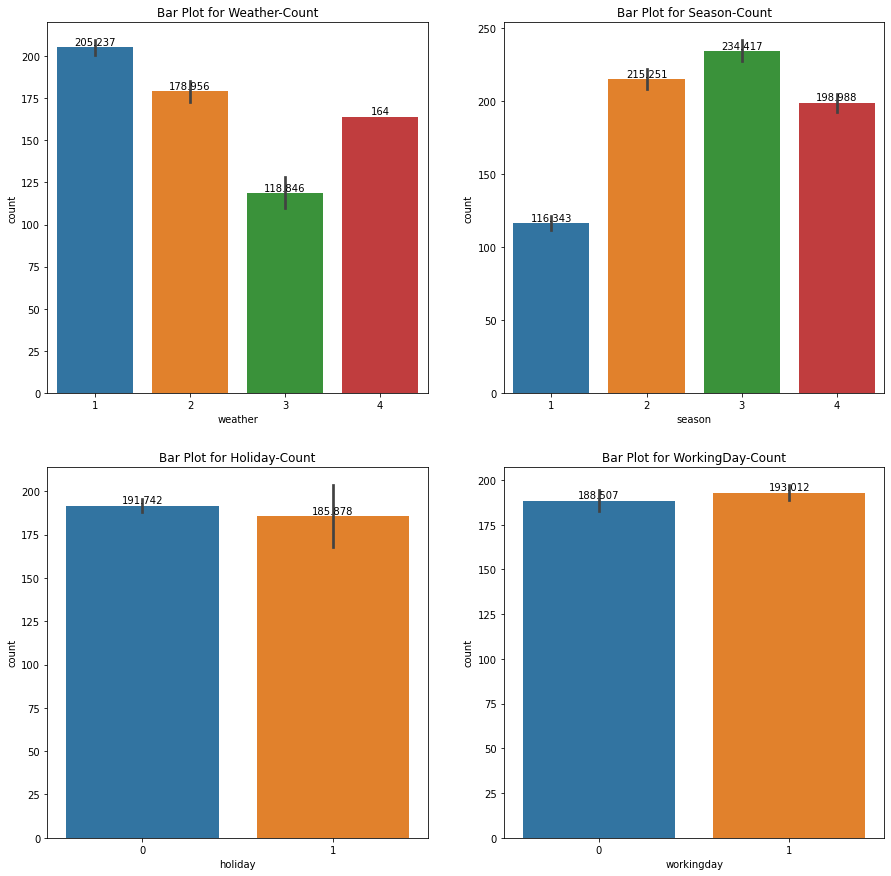

In [237]:
# We can see relation between Categorical Varibale and Count from bar plot also 

fig,axis = plt.subplots(nrows = 2 ,ncols = 2,figsize=(15,15))

ax = sns.barplot(x='weather',y='count' ,data =data , estimator = np.mean, ax= axis[0,0])
axis[0,0].set_title("Bar Plot for Weather-Count")

for i in ax.containers:
 ax.bar_label(i)

ax = sns.barplot(x='season',y='count' ,data =data , estimator = np.mean, ax= axis[0,1])
axis[0,1].set_title("Bar Plot for Season-Count")

for i in ax.containers:
 ax.bar_label(i)

ax=sns.barplot(x='holiday',y='count' ,data =data , estimator = np.mean, ax= axis[1,0])
axis[1,0].set_title("Bar Plot for Holiday-Count")

for i in ax.containers:
 ax.bar_label(i)

ax = sns.barplot(x='workingday',y='count' ,data =data , estimator = np.mean, ax= axis[1,1])
axis[1,1].set_title("Bar Plot for WorkingDay-Count")

for i in ax.containers:
 ax.bar_label(i)



plt.show()

- For weather and season we can see that different weather and season has significant effect on count of rented bikes .
- For holiday and workingday we can see that it has very less effect on count of rented bikes .

### Checking number of outliers in Each Column

In [195]:
# Summary of data
data_describe = data.describe()
data_describe

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [196]:
data_describe.loc['IQR',:] = data_describe.loc['75%',:] - data_describe.loc['25%',:]
data_describe


,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
IQR,12.30000,14.395000,30.000000,9.996400,45.000000,186.000000,242.000000


In [197]:
data_describe.loc['UW',:] = data_describe.loc['75%',:] + 1.5* data_describe.loc['IQR',:]
data_describe.loc['LW',:] = data_describe.loc['25%',:] - 1.5* data_describe.loc['IQR',:]
data_describe

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
IQR,12.30000,14.395000,30.000000,9.996400,45.000000,186.000000,242.000000
UW,44.69000,52.652500,122.000000,31.992500,116.500000,501.000000,647.000000


In [198]:
# Creating a new row in data_describe to hold number of outlier present in the column
for i in data_describe.keys():
    data_describe.loc['Count_Outliers',i] = data[(data[i] > data_describe.loc['UW',i]) | 
                                                 (data[i] < data_describe.loc['LW',i])].shape[0]

In [199]:
data_describe

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
IQR,12.30000,14.395000,30.000000,9.996400,45.000000,186.000000,242.000000
UW,44.69000,52.652500,122.000000,31.992500,116.500000,501.000000,647.000000


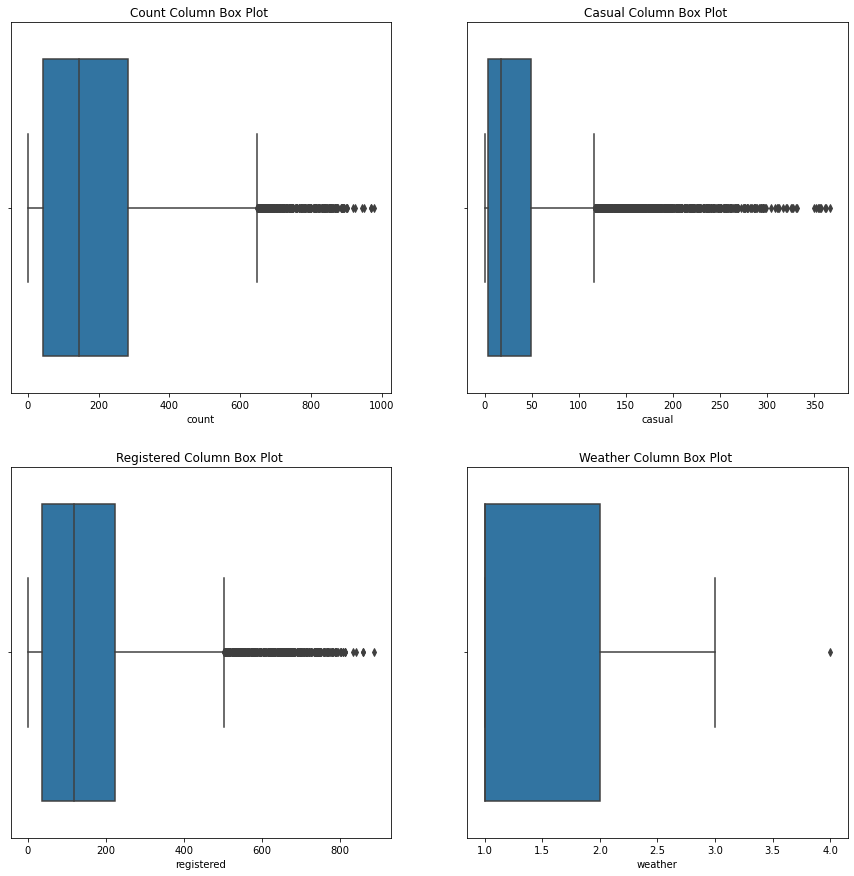

In [200]:
# We can see outlier present in column using Box plot also 

fig,axis = plt.subplots(nrows = 2 ,ncols = 2,figsize=(15,15))

sns.boxplot(x=data['count'], ax= axis[0,0])
axis[0,0].set_title("Count Column Box Plot ")

sns.boxplot(x=data['casual'], ax= axis[0,1])
axis[0,1].set_title("Casual Column Box Plot ")

sns.boxplot(x=data['registered'], ax= axis[1,0])
axis[1,0].set_title("Registered Column Box Plot ")

sns.boxplot(x=data['weather'], ax= axis[1,1])
axis[1,1].set_title("Weather Column Box Plot ")

plt.show()

## 1. Effect of Working day (Categorical) on Count of total rental bikes (Numerical )

In [201]:
data['workingday'].value_counts() 

1    7412
0    3474
Name: workingday, dtype: int64

- Workingday 1 means it is working day
- Workingday 0 means either weekend or holiday

In [202]:
workingday_1 = data.loc[data['workingday'] == 1 ,'count']
workingday_0 = data.loc[data['workingday'] == 0 ,'count']

In [203]:
# As there are 2 groups to compare categorical vs numerical so we are using 2 sample T-test  (unpaired t-test)
# H0 : Mean of workingday 0 count of total rental bikes  = Mean of workingday 1 count of total rental bikes 
# Ha : Mean of workingday 0 count of total rental bikes  <> Mean of workingday 1 count of total rental bikes 
ttest_ind(workingday_0,workingday_1)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

- Say significance is 0.05  , As p (0.226) > 0.05 (significance) so we FAIL to reject Null Hypothesis (H0).
- Hence working day does not have an impact on total count of rental bikes

## 2. Effect of Weather (Categorical) on Count of total rental bikes (Numerical )

In [204]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

- For weather 4 there is only 1 row data , which is very less and shows that very less bikes are rented in this weather

In [205]:
# creating groups of each waether 1 to 4 having count of total rental bikes in each weather
weather_1 = data.loc[data['weather'] == 1 ,'count']
weather_2 = data.loc[data['weather'] == 2 ,'count']
weather_3 = data.loc[data['weather'] == 3 ,'count']
weather_4 = data.loc[data['weather'] == 4 ,'count']

In [206]:
print('Total Count of rental Bikes in Weather 1 : ',sum(weather_1))
print('Total Count of rental Bikes in Weather 2 : ',sum(weather_2))
print('Total Count of rental Bikes in Weather 3 : ',sum(weather_3))
print('Total Count of rental Bikes in Weather 4 : ',sum(weather_4))

Total Count of rental Bikes in Weather 1 :  1476063
Total Count of rental Bikes in Weather 2 :  507160
Total Count of rental Bikes in Weather 3 :  102089
Total Count of rental Bikes in Weather 4 :  164


- Note :To apply ANOVA following 3 must be True 
1. The data must be Gaussian - Shapiro / QQ PLot Test used 
2. The variance in each group should be same - Leven Test used
3. Data should be independent 

- Assume significance is 0.05 (95% Confidence Interval )

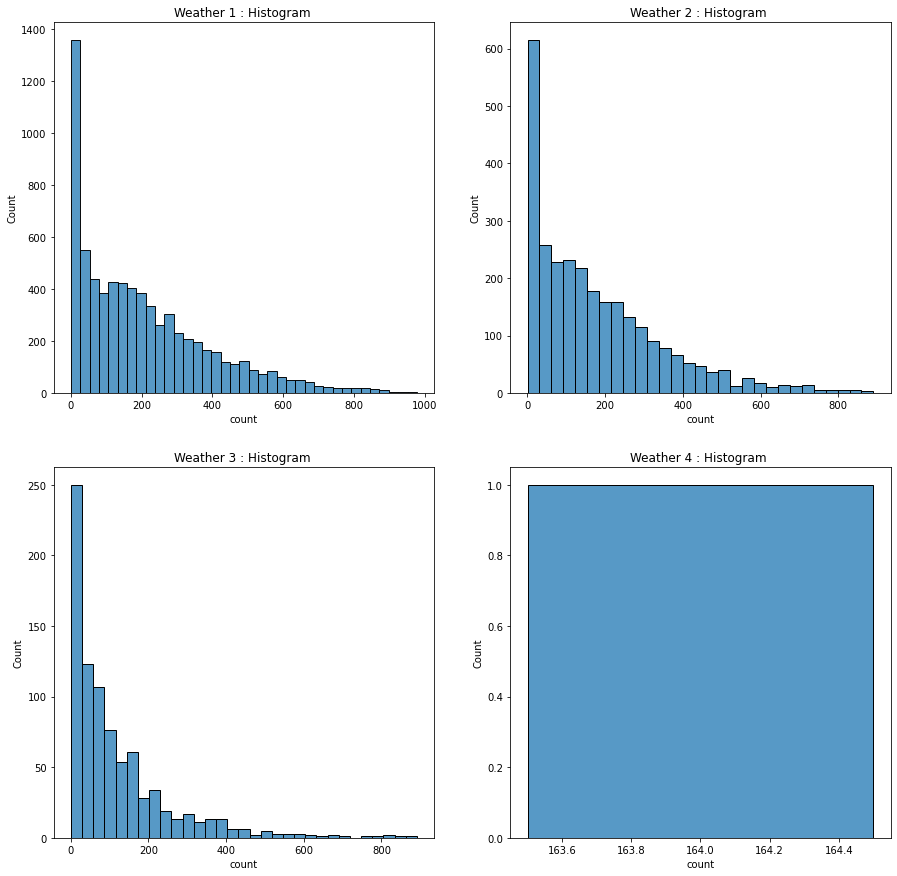

In [207]:
fig,axis = plt.subplots(nrows = 2 ,ncols = 2,figsize=(15,15))

sns.histplot(weather_1, ax= axis[0,0])
axis[0,0].set_title("Weather 1 : Histogram ")

sns.histplot(weather_2, ax= axis[0,1])
axis[0,1].set_title("Weather 2 : Histogram ")

sns.histplot(weather_3, ax= axis[1,0])
axis[1,0].set_title("Weather 3 : Histogram ")

sns.histplot(weather_4, ax= axis[1,1])
axis[1,1].set_title("Weather 4 : Histogram ")

plt.show()

### QQ Plot Test

E:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
E:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
E:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
E:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument w

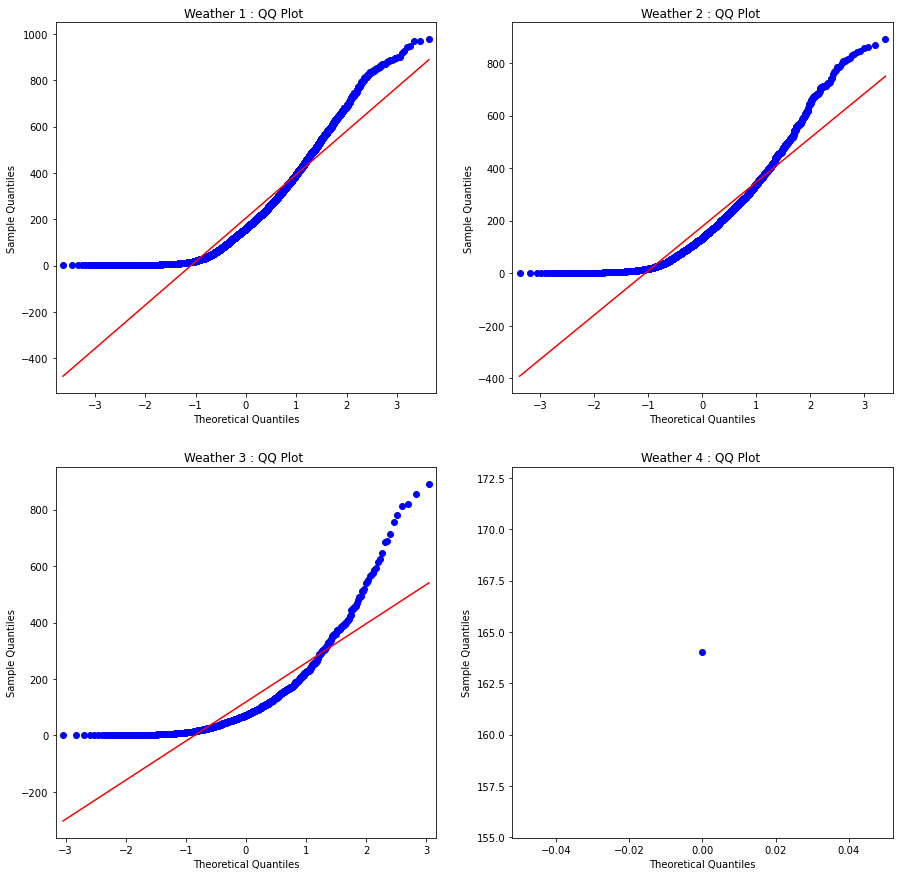

In [208]:
fig,axis = plt.subplots(nrows = 2 ,ncols = 2,figsize=(15,15))

qqplot(weather_1,line='s', ax= axis[0,0])
axis[0,0].set_title("Weather 1 : QQ Plot ")

qqplot(weather_2,line='s', ax= axis[0,1])
axis[0,1].set_title("Weather 2 : QQ Plot ")

qqplot(weather_3,line='s', ax= axis[1,0])
axis[1,0].set_title("Weather 3 : QQ Plot ")

qqplot(weather_4,line='s', ax= axis[1,1])
axis[1,1].set_title("Weather 4 : QQ Plot ")

plt.show()

- Data is not Gaussian this can be seen from histogram plot of the data groups and from QQ Plot shown above showing that it is not following gaussian trend .

### Shapiro Test

In [209]:
# As shapiro is is used to when we have few samples . So taking 200 sample from each weather count .
# H0 : data is gaussian 
# Ha : data is not gaussian

print('Weather 1 ',shapiro(weather_1.sample(200)))
print('Weather 2 ',shapiro(weather_2.sample(200)))
print('Weather 3 ',shapiro(weather_3.sample(200)))
# For weather 4 not enough data so cannot apply shapino test

Weather 1  ShapiroResult(statistic=0.9038112163543701, pvalue=4.4246467600927986e-10)
Weather 2  ShapiroResult(statistic=0.8606392741203308, pvalue=1.4556546072685972e-12)
Weather 3  ShapiroResult(statistic=0.7434263229370117, pvalue=2.5091408842330373e-17)


- Say significance is 0.05 , As p value ( for all) < 0.05 so we reject Null Hypothesis (H0)
- Hence data is not Gaussian for count of total rental bikes in all weathers 

### Levene test 

In [210]:
# H0 : variance is same in each group
# Ha : variance is not same in each group
levene(weather_1,weather_2,weather_3,weather_4) # Included weather_4 here but it has only 1 row data which is not enogh

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

- As p < 0.05 so we reject H0 (null hypothesis) . Hence variance is not same in each group 

### ANOVA Test 

In [211]:
# ANOVA Test to compare 4 weather groups count 
# H0 : mean count of total rental bikes is SAME in each group
# Ha : mean count of total rental bikes is DIFFERENT in one or more group
f_oneway(weather_1,weather_2,weather_3,weather_4 )

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

- As p < 0.05 so we reject H0 . So mean count of total rental bikes is DIFFERENT in one or more weather group

### KRUSKAL Test

- NOTE : As QQ Plot / Shapiro failed to prove that data is gaussian and also Levene test failed to prove that variance is same in each group so ideally we cannot use ANOVA Test as its prequist failed . So we should use Krukal Test if we cannot use ANOVA


In [212]:
# KRUSKAL Test to compare 4 weather groups count 
# H0 : mean count of total rental bikes is SAME in each group
# Ha : mean count of total rental bikes is DIFFERENT in one or more group
kruskal(weather_1,weather_2,weather_3,weather_4 )

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

- As p < 0.05 so we reject H0 . So mean count of total rental bikes is DIFFERENT in one or more weather group
- So we can say that weather has an effect on total count of rental bikes
- This can also been seen by Weather = 4 Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog has very low (lowest ) count of total rental bikes 

## 3. Effect of Season (Categorical) on Count of total rental bikes (Numerical )

In [213]:
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [214]:
# creating groups of each season 1 to 4 having count of total rental bikes in each season
season_1 = data.loc[data['season'] == 1 ,'count']
season_2 = data.loc[data['season'] == 2 ,'count']
season_3 = data.loc[data['season'] == 3 ,'count']
season_4 = data.loc[data['season'] == 4 ,'count']

In [215]:
print('Total Count of rental Bikes in Season 1 : ',sum(season_1))
print('Total Count of rental Bikes in Season 2 : ',sum(season_2))
print('Total Count of rental Bikes in Season 3 : ',sum(season_3))
print('Total Count of rental Bikes in Season 4 : ',sum(season_4))

Total Count of rental Bikes in Season 1 :  312498
Total Count of rental Bikes in Season 2 :  588282
Total Count of rental Bikes in Season 3 :  640662
Total Count of rental Bikes in Season 4 :  544034


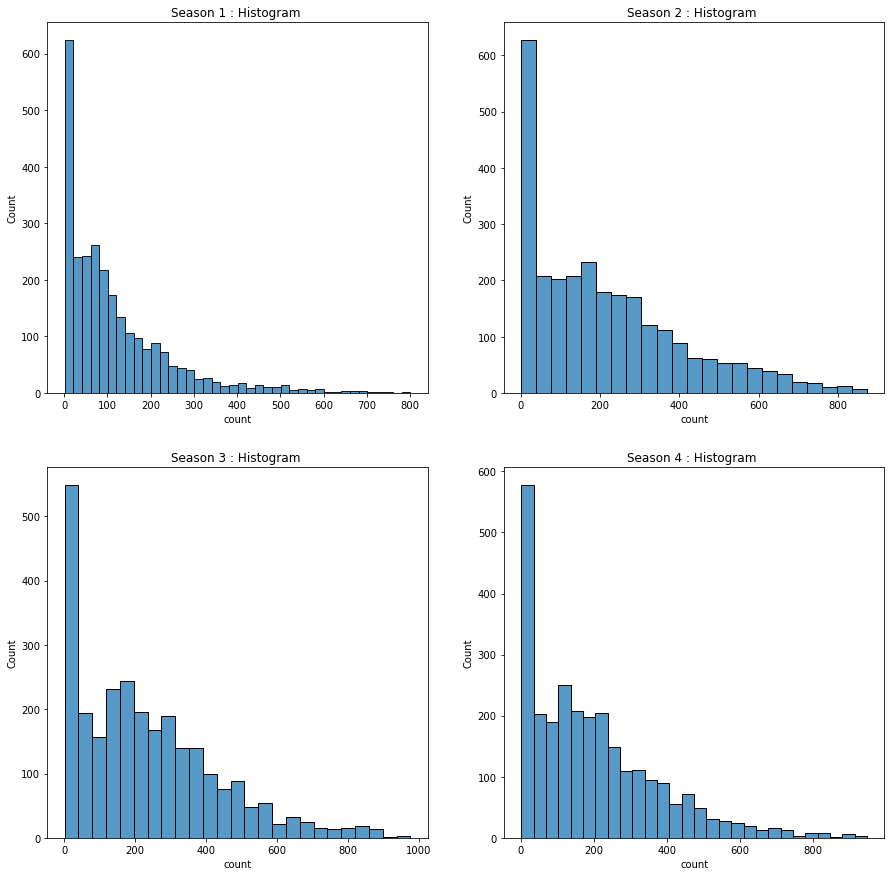

In [216]:
fig,axis = plt.subplots(nrows = 2 ,ncols = 2,figsize=(15,15))

sns.histplot(season_1, ax= axis[0,0])
axis[0,0].set_title("Season 1 : Histogram ")

sns.histplot(season_2, ax= axis[0,1])
axis[0,1].set_title("Season 2 : Histogram ")

sns.histplot(season_3, ax= axis[1,0])
axis[1,0].set_title("Season 3 : Histogram ")

sns.histplot(season_4, ax= axis[1,1])
axis[1,1].set_title("Season 4 : Histogram ")

plt.show()

### QQ Plot Test

E:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
E:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
E:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
E:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument w

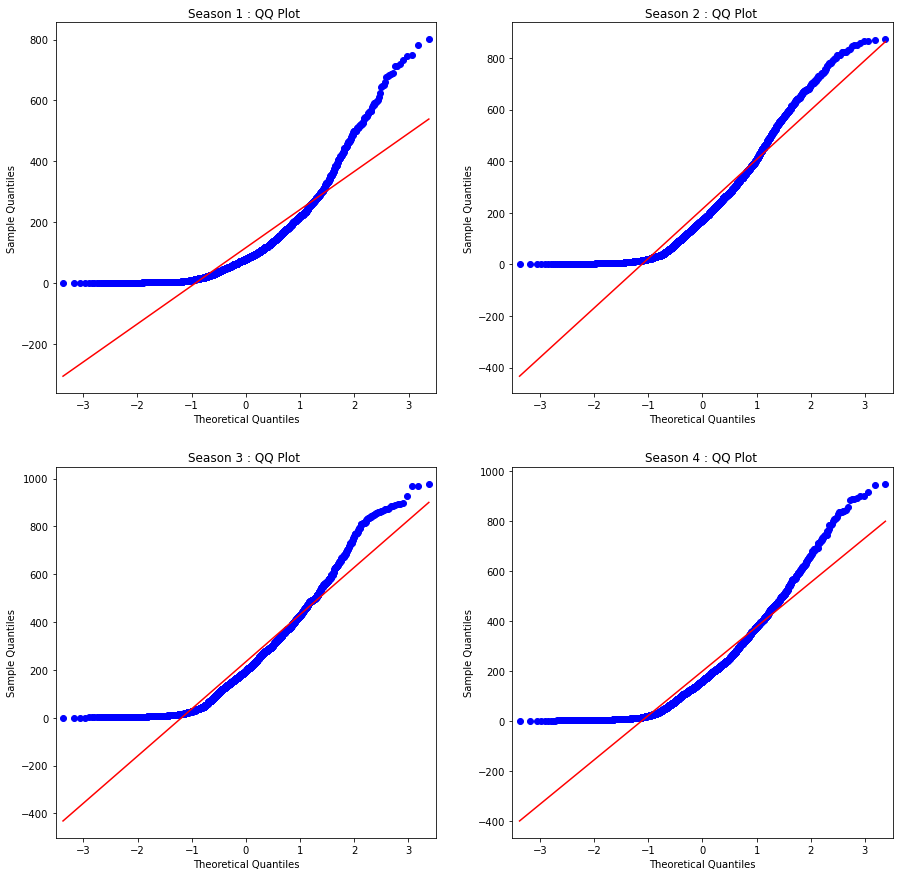

In [217]:
fig,axis = plt.subplots(nrows = 2 ,ncols = 2,figsize=(15,15))

qqplot(season_1,line='s', ax= axis[0,0])
axis[0,0].set_title("Season 1 : QQ Plot ")

qqplot(season_2,line='s', ax= axis[0,1])
axis[0,1].set_title("Season 2 : QQ Plot ")

qqplot(season_3,line='s', ax= axis[1,0])
axis[1,0].set_title("Season 3 : QQ Plot ")

qqplot(season_4,line='s', ax= axis[1,1])
axis[1,1].set_title("Season 4 : QQ Plot ")

plt.show()

- Data is not Gaussian this can be seen from histogram plot of the data groups and from QQ Plot shown above showing that it is not following gaussian trend .

### Shapiro Test

In [218]:
# As shapiro is is used to when we have few samples . So taking 200 sample from each season count .
# H0 : data is gaussian 
# Ha : data is not gaussian

print('Season 1 ',shapiro(season_1.sample(200)))
print('Season 2 ',shapiro(season_2.sample(200)))
print('Season 3 ',shapiro(season_3.sample(200)))
print('Season 4 ',shapiro(season_4.sample(200)))

Season 1  ShapiroResult(statistic=0.8078007698059082, pvalue=5.744455899050734e-15)
Season 2  ShapiroResult(statistic=0.898324191570282, pvalue=1.9680931884202835e-10)
Season 3  ShapiroResult(statistic=0.9169405102729797, pvalue=3.4936167292443088e-09)
Season 4  ShapiroResult(statistic=0.8757854700088501, pvalue=9.261524706871693e-12)


- Say significance is 0.05 , As p value ( for all) < 0.05 so we reject Null Hypothesis (H0)
- Hence data is not Gaussian for count of total rental bikes in all seasons 

### Levene test 

In [219]:
# H0 : variance is same in each group
# Ha : variance is not same in each group
levene(season_1,season_2,season_3,season_4)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

- As p < 0.05 so we reject H0 (null hypothesis) . Hence variance is not same in each group 

### ANOVA Test 

In [220]:
# ANOVA Test to compare 4 season groups count 
# H0 : mean count of total rental bikes is SAME in each group
# Ha : mean count of total rental bikes is DIFFERENT in one or more season group
f_oneway(season_1,season_2,season_3,season_4 )

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

- As p < 0.05 so we reject H0 . So mean count of total rental bikes is DIFFERENT in one or more season group

### KRUSKAL Test

- NOTE : As QQ Plot / Shapiro failed to prove that data is gaussian and also Levene test failed to prove that variance is same in each group so ideally we cannot use ANOVA Test as its prequist failed . So we should use Krukal Test if we cannot use ANOVA


In [221]:
# KRUSKAL Test to compare 4 season groups count 
# H0 : mean count of total rental bikes is SAME in each group
# Ha : mean count of total rental bikes is DIFFERENT in one or more group
kruskal(season_1,season_2,season_3,season_4 )

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

- As p < 0.05 so we reject H0 . So mean count of total rental bikes is DIFFERENT in one or more season group
- So we can say that season has an effect on total count of rental bikes

## 4. Check if Weather (Categorical ) dependent on Season (Categorical)

In [222]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [223]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [224]:
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [225]:
pd.crosstab(index=data['season'],columns = data['weather'],margins =True)

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


In [226]:
# Chi-square test used to compare 2 categorical values
# H0 : Season and Weather are independent
# Ha : Season and Weather are dependent on each other

chi2_contingency(pd.crosstab(index=data['season'],columns = data['weather']))

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

- Here P value is 1.549925073686492e-07 
- Say significance is 0.05 . So as p < 0.05 so we reject Null Hypothesis (H0)
- Hence Season and Weather are dependent on each other

## 5. Check if Holiday (Categorical) has any effect on Count of total rental bikes (Numerical)

In [227]:
data['holiday'].value_counts()
# Say 0 means no Holiday  and 1 means holiday

0    10575
1      311
Name: holiday, dtype: int64

In [228]:
holiday_0 = data.loc[data['holiday']==0 ,'count']
holiday_1 = data.loc[data['holiday']==1 ,'count']

In [229]:
# H0 : Mean of total rental bike count on Holiday (holiday_1) = Mean of total rental bike count on Not Holiday (holiday_0)
# Ha : Mean of total rental bike count on Holiday (holiday_1) <> Mean of total rental bike count on Not Holiday (holiday_0)

ttest_ind(holiday_0,holiday_1)

Ttest_indResult(statistic=0.5626388963477119, pvalue=0.5736923883271103)

- As p = 0.573 . So a p > 0.05 (siginificance) , we fail to reject Null Hypothesis (H0).
- So Mean of total rental bike count on Holiday (holiday_1) = Mean of total rental bike count on Not Holiday (holiday_0)
- So Holiday does not has any effect on Count of total rental bikes

## Insights :- 
- There are 10886 rows and 12 columns in data
- There is no null values in any column
- Holiday , Workingday,Season and Weather are Categorical Columns : Independent Columns
- Count is Numerical Column : Dependet Columns (Target Column)
- Assume significance is 0.05 (95% Confidence Interval)

<br>

- From 2 Sample T-Test , As p (0.226) > 0.05 (significance) so we FAIL to reject Null Hypothesis (H0).Hence __working day does not have an impact on total count of rental bikes__ .

<br>

- From ANOVA / Kruskal Test , As p < 0.05 so we reject H0 . So mean count of total rental bikes is DIFFERENT in one or more weather group.So we can say that __weather has an effect on total count of rental bikes__ . This can also been seen by Weather = 4 Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog has very low (lowest ) count of total rental bikes.
- For Count of Rental bikes in each weather group ,Data is not Gaussian this can be seen from histogram plot of the data groups , from QQ Plot and Shapiro Test showing that it is not following gaussian trend .
- Also variance of each weather group is not same , this was tested using Levene Test .

<br>

- From ANOVA / Kruskal Test , As p < 0.05 so we reject H0 . So mean count of total rental bikes is DIFFERENT in one or more season group .So we can say that __season has an effect on total count of rental bikes__ .
- For Count of Rental bikes in each season group ,Data is not Gaussian this can be seen from histogram plot of the data groups , from QQ Plot and Shapiro Test showing that it is not following gaussian trend .
- Also variance of each season group is not same , this was tested using Levene Test .

<br>

- From Chi- Square Test (contingency test) ,as p < 0.05 so we reject Null Hypothesis (H0) . Hence __Season and Weather are dependent on each other__

<br>

- From 2 Sample T-Test , So a p (0.573) > 0.05 (siginificance) , we fail to reject Null Hypothesis (H0).So Mean of total rental bike count on Holiday (holiday_1) is EQUAL to Mean of total rental bike count on Not Holiday (holiday_0) . So __Holiday does not has any effect on Count of total rental bikes__


## Recommendations :
- Weather and Season are significant variables in predicting the count of total rental bike demand in market .
- If weather is not good Like say weather = 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) then ideally and from data also we can see the count of rental bikes is very less . This is expected a in this weather very few people will be using the electric bike.
- Working day does not have an impact on total count of rental bikes . So it means that demand of rental bike will not be effected no matter if it is a working day or not.
- Similary Holiday does not has any effect on Count of total rental bikes .So it is not a significant variables in predicting the count of total rental bike demand in market .
- Based on above insights Company can increase / decrease the frequency of rental bikes based on Weather conditions and Season .
- For good weather like Weather Status 1 to 3 they can intoroduce new rental bikes in remote areas .
- For bad wether like Heavy Rainfall ( weather status = 4) , they can provide special discount ( like upto 50%) to customers using the bike in this weather . Doing this will not only encourage more customers to use rented bike but will also increase the overall customer base of the company who will be using the rented bike in other weather also .
- Company should also try to arrange for special types of bike in Bad Weather Like Bike with overhead shade to protect the customers from rain and a emergency helpline number should we shared with users in case of any help in bad weather .
- Another main reason why count of rented bikes is very less in Bad Weather ( Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ) , is that there can be no accessible nearest rental bikes near customer .So based on weather predictions company can make few rental bike availables in some remote location also during the duration of bad weather .
- For regular users of rented bike a tier system can be introduecd (Like Silver - Platinum - Gold ) . Most using customers of rented bike will be part of Hier Tier user group and will be given Additional discounts . 
